# PHXS 491_001: Observational Astronomy - Homework 3

### Due Sep 21, 2021
Remember to save your completed notebook as a PDF and upload to Brightspace under Assignments.

Name:

## Please use the "primt()" function (notice the "m") to print out your answers in magenta.  This makes grading easier.  You might need to "print to PDF" to get the colors to show up. Thanks to Katie for figuring this out.

In [1]:
def primt(*args):
    '''
    For any amount of arguments "*args", prints in magenta.
    '''
    magenta = "\x1B[38;5;201m"   # the color in ANSI code
    for el in args:  # for each argument
        magenta += " "+(str(el))  # add the argument to the string to be printed
    print(magenta)   #print!

In [2]:
primt('test')

 test


In [3]:
#Imports
import numpy as np
from astropy.table import Table
from astropy import units as u

from matplotlib import pyplot as plt
from __future__ import print_function
from astropy.time import Time
import datetime
%matplotlib inline
import astropy.coordinates as coord

# Part 1: Telescope Optics Questions


1) How much fainter can you see with a 4m diameter telescope than 12 inch diameter telescope?  What is the difference in magnitudes?



In [39]:
# difference in flux will be a ratio of these areas. So: 
ratio = ((12*(u.imperial.inch))**2 / (4*u.m)**2).to(u.dimensionless_unscaled)
deltam = -2.5*np.log10(ratio)
primt(f"Ratio of flux/how much dimmer: {ratio:.2e}")
primt(f"Difference in mag: {deltam:.2f}")

 Ratio of flux/how much dimmer: 5.81e-03
 Difference in mag: 5.59


2) Calculate the image scale of a telescope with a diameter of 800 mm and a focal ratio of 7 (give answer in arcsec/mm)?


In [5]:
s2 = 800 * u.mm
f = 7 * s2
p = 206265*u.arcsec/f
primt(f"Plate scale: {p:.2f}")

 Plate scale: 36.83 arcsec / mm


3) If we have a CCD detector with a size of 2cm on the telescope from #2, what field of view (in arcmin) will we have?

In [6]:
fov = (p*2*u.cm).to(u.arcmin)
primt(f"FOV: {fov:.2f}")

 FOV: 12.28 arcmin


4) What is the diffraction limit for a 20 inch diameter telescope at 700nm?


In [7]:
diffraction = 1.22 * 700*u.nm/(20*u.imperial.inch)
diffraction = diffraction.to(u.dimensionless_unscaled)*u.radian
primt(f"Diffraction: {diffraction:.2e}")

 Diffraction: 1.68e-06 rad


5)  Calculate the magnification of the telescope in #2 when used with an eyepiece of focal length 15 mm?

In [8]:
M = f/(15*u.mm)
primt(f"Magnification: {M:.2f}")

 Magnification: 373.33


# Part 2: Intro to Plotting
The purpose of this section is to explore how to make simple plots in Python. In later sections we will explore more advanced plotting techniques, but for now our goal is to be able to do some everyday plots with our data. I relied heavily on the Matplotlib Pyplot Tutorial (https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py).

## Setting things up
There are a number of new imports we need to do in order to create plots. All of the plotting we will do in this class uses the module **Matplotlib** [https://matplotlib.org/]. This module gives us access to a huge array of different plotting tools. Matplotlib is so tightly interwoven with Python notebooks that there is a special set of magic keywords associated with it. All magic keywords are precedded with a %. The one we will use is called `%matplotlib inline`. It allows us to display plots directly in the notebook without issue.

In [9]:
import numpy as np
from astropy.table import Table
from astropy import units as u

from matplotlib import pyplot as plt #Our new imports
#The matplotlib magic. Don't forget this in new notebooks
%matplotlib inline 

# Simple Plots
The simplest plots are just line or scatter plots. Generally you start with an x array and a y array for your points.

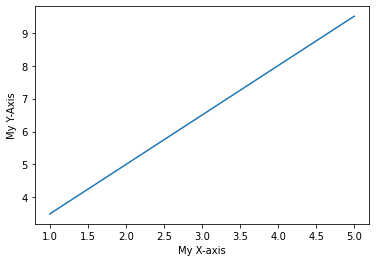

In [10]:
x = np.array([1,2,3,4,5])
y = 1.5*x+2
plt.plot(x,y)
plt.xlabel('My X-axis')
plt.ylabel('My Y-Axis')
plt.show() #This is only necessary if plotting is not the last thing in the code cell.

We can plot more than one thing on a plot at a time. All we have to do is issue more ploting commands. I can control the color and type of the line using a format string.  The format string consists of a color and a style. In python notebooks, we should use `plt.tight_layout()` instead of `plt.show()` because it causes everything to fit, especially with multiplots.

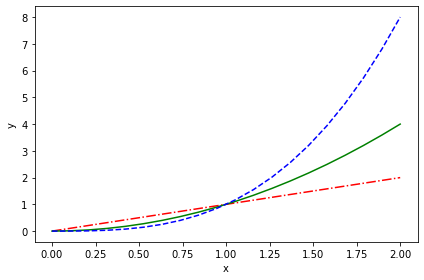

In [11]:
x = np.linspace(0, 2, 20) #Create 20 linearly space points from (0,2)

plt.plot(x, x,'r-.') #Red line dash-dot
plt.plot(x, x**2,'g-') #Green line normal
plt.plot(x, x**3,'b--') #Blue line dashed

plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout() 

We can also add Titles, legends and use points instead of lines.

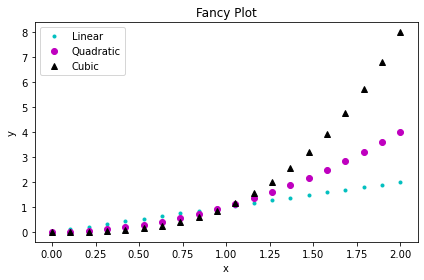

In [12]:
x = np.linspace(0, 2, 20) #Create 20 linearly space points from (0,2)

plt.plot(x, x,'c.', label="Linear") #Cyan line dash-dot
plt.plot(x, x**2,'mo', label="Quadratic") #Magenta line normal
plt.plot(x, x**3,'k^', label="Cubic") #Black line dashed

plt.xlabel('x')
plt.ylabel('y')
plt.title("Fancy Plot")
plt.legend()

plt.tight_layout() 

## Now it is your turn
Create a plot of sin(x) and cos(x) going from 0 to $2\pi$. Be sure to include a legend.

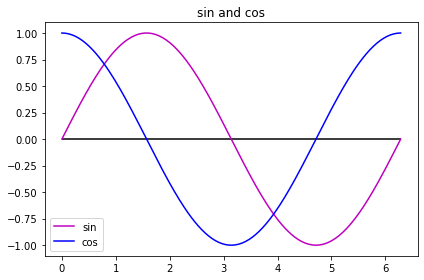

In [13]:
x = np.linspace(0,2*np.pi,200)

plt.plot(x,np.sin(x),"m",label="sin")
plt.plot(x,np.cos(x),"blue",label="cos")
plt.hlines(0,0,2*np.pi,"black")
plt.title("sin and cos")
plt.legend()
plt.tight_layout() 

## Multiple plots
Sometimes you want to have more than one plot at a time. You can use the `plt.subplot` to help you out. The order of arguements is (num_ver,num_hor,plot_num). You need to give all the plot elements for each plot (`xlabel`,`title`,etc).

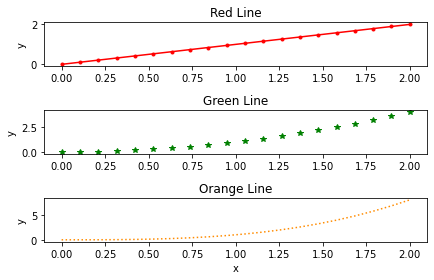

In [14]:
plt.subplot(311)
x = np.linspace(0, 2, 20) #Create 20 linearly space points from (0,2)

plt.plot(x, x,'r.-')
plt.ylabel('y')
plt.title('Red Line')

plt.subplot(312)
plt.plot(x, x**2,c='green', marker='*', ls='None')
plt.ylabel('y')
plt.title('Green Line')

plt.subplot(313)
plt.plot(x, x**3,c='darkorange',ls=':')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orange Line')

plt.tight_layout()

## Controlling the axis
You can also make plots with logarithmic axis and control the x and y limits of the axis.

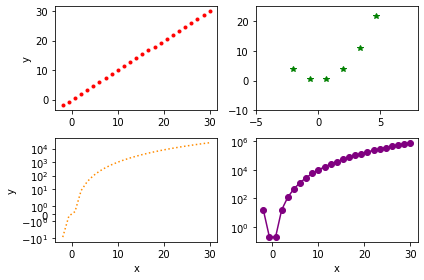

In [15]:
plt.subplot(221)
x = np.linspace(-2, 30, 25) #Create 20 linearly space points from (0,2)

plt.plot(x, x,'r.')
plt.ylabel('y')

plt.subplot(222)
plt.plot(x, x**2,c='green', marker='*', ls='None')
plt.xlim(-5,8)
plt.ylim(-10,25)

plt.subplot(223)
plt.plot(x, x**3,c='darkorange',ls=':')
plt.xlabel('x')
plt.ylabel('y')
plt.yscale('symlog') #Handles the range around 0 in linear coordinates.

plt.subplot(224)
plt.plot(x, x**4,c='purple',marker='o')
plt.yscale('log')
plt.xlabel('x')

plt.tight_layout()

## Data with Errorbars
Let's read in some data and add errorbars to the plot. The method `plt.errorbar` gives one access to the keywords `xerr` and `yerr`. Note that `plt.show()` is better with a `suptitle`. Mulitpolots always take some effort to get right.

<TableColumns names=('#HIP (Name)','Ra (Degrees)','Dec (Degrees)','Plx (milliarcsec)','B (mag)','V (mag)','err_Plx','err_B','err_V')>


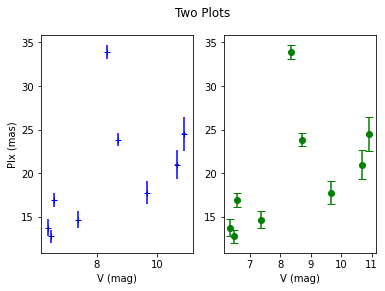

In [16]:
hip_tab = Table.read('data/hip_tiny.csv')
print(hip_tab.columns) #Print the columns of the table

plt.subplot(1,2,1)
plt.errorbar(hip_tab['V (mag)'],hip_tab['Plx (milliarcsec)'],xerr=hip_tab['err_V'],yerr=hip_tab['err_Plx'],fmt='b+')
plt.xlabel('V (mag)')
plt.ylabel('Plx (mas)')

plt.subplot(1,2,2)
plt.errorbar(hip_tab['V (mag)'],hip_tab['Plx (milliarcsec)'],yerr=hip_tab['err_Plx'],fmt='go',capsize=4)
plt.xlabel('V (mag)')
plt.suptitle("Two Plots")
plt.show()

## Histograms
When plot large amounts of data you often want to use a histogram. A histogram is when you take data and you put it into a series of bins. The x-axis is the value you are histogramming and the y-axis is the number of items in each bin. The number of bins you use is up to you, if you set bins to `'auto'`, it will use an algorithm to find the best number of bins. It is worth noting that you want enough bins to see what is happening in the data, but not so many that you have to few objects in each bin. Usage: `plt.hist(data,bins,keywords)`. You can also add text to your plot. When using text put an `r'text'` means raw string. We use that if we don't want to use things like `\n`. If you include `$TeX formating$` you can use TeX math formating to give fancy symbols.

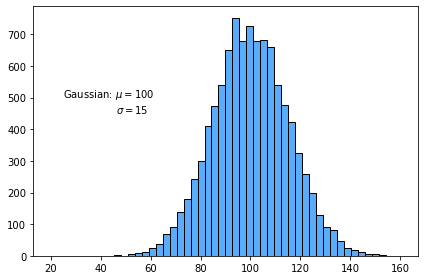

In [17]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000) #Generate some Gaussian normal data

plt.hist(x,50,range=(20,160),color="#58ACFA",edgecolor='black')
plt.text(25, 500, r'Gaussian: $\mu={}$'.format(mu)) #Using Data coordinates
plt.text(.215,.57,r'$\sigma={}$'.format(sigma),transform=plt.gca().transAxes) #Using axes coordinates (0,0) to (1,1)
plt.tight_layout()

## Your Turn
Take the data from hip_small.csv and make 2 histograms side by side horizontally. The first histogram should be of B (mag) and the other V (mag). Write the max, mean and min of the data set on each plot.

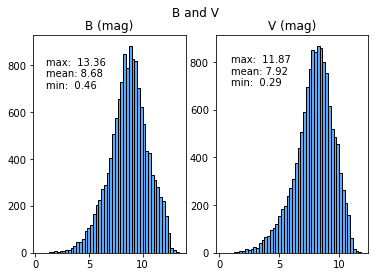

In [35]:
hip_tab_small = Table.read('data/hip_small.csv')


plt.subplot(1,2,1)
plt.hist(hip_tab_small['B (mag)'],50,color="#58ACFA",edgecolor='black')
plt.text(1, 800, r'max:  {:.2f}'.format(np.max(hip_tab_small["B (mag)"])))
plt.text(1, 750,  r'mean: {:.2f}'.format(np.mean(hip_tab_small["B (mag)"])))
plt.text(1, 700, r'min:  {:.2f}'.format(np.min(hip_tab_small["B (mag)"])))
plt.title("B (mag)")

plt.subplot(1,2,2)
plt.hist(hip_tab_small['V (mag)'],50,color="#58ACFA",edgecolor='black')
plt.text(1, 800, r'max:  {:.2f}'.format(np.max(hip_tab_small["V (mag)"])))
plt.text(1, 750,  r'mean: {:.2f}'.format(np.mean(hip_tab_small["V (mag)"])))
plt.text(1, 700, r'min:  {:.2f}'.format(np.min(hip_tab_small["V (mag)"])))
plt.title("V (mag)")
plt.suptitle("B and V")
plt.show()

# Part 3: Intro to Astropy Time
One of the other major transformations that people tend to do is working with is time. Astropy has several ways to help you go back and forth between different time units. (This notebook is based on the astropy.time tutorial).

In [19]:
from __future__ import print_function
from astropy.time import Time
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.coordinates as coord
import astropy.units as u

In [20]:
times = ['1999-01-01T00:00:00.123456789', '2010-01-01T00:00:00'] #These are UTC times
t = Time(times, format='isot', scale='utc')
print(t)

['1999-01-01T00:00:00.123' '2010-01-01T00:00:00.000']


## Time Formats
One of the first things you are going to want to be able to do is convert among a variety of formats. Generally speacking you will have a time in the form of a date and an HH:MM:SS.S, and you will need a way to go to the many different representations of time.

| Format 	|Class 	|Example argument|
| ---- | ---- | ---- |
| byear 	|TimeBesselianEpoch 	|1950.0|
| byear_str 	|TimeBesselianEpochString 	|‘B1950.0’|
| cxcsec 	|TimeCxcSec 	|63072064.184|
| datetime 	|TimeDatetime 	|datetime(2000, 1, 2, 12, 0, 0)|
| decimalyear 	|TimeDecimalYear 	|2000.45|
| fits 	|TimeFITS 	|‘2000-01-01T00:00:00.000(TAI)’|
| gps 	|TimeGPS 	|630720013.0|
| iso 	|TimeISO 	|‘2000-01-01 00:00:00.000’|
| isot 	|TimeISOT 	|‘2000-01-01T00:00:00.000’|
| jd 	|TimeJD 	|2451544.5|
| jyear 	|TimeJulianEpoch 	|2000.0|
| jyear_str 	|TimeJulianEpochString 	|‘J2000.0’|
| mjd 	|TimeMJD 	|51544.0|
| plot_date 	|TimePlotDate 	|730120.0003703703|
| unix 	|TimeUnix 	|946684800.0|
| yday 	|TimeYearDayTime 	|2000:001:00:00:00.000|

In [21]:
for formats in Time.FORMATS:
    print("{}, ".format(formats),end="")

jd, mjd, decimalyear, unix, unix_tai, cxcsec, gps, plot_date, stardate, datetime, ymdhms, iso, isot, yday, datetime64, fits, byear, jyear, byear_str, jyear_str, 

You can change format by setting the format object to a new value.

In [22]:
t.format = 'jd'
print(t[0])
print(t[0].jd)
print("{:.8f}".format(t[0].jd)) #Be careful about rounding

2451179.500001429
2451179.500001429
2451179.50000143


Convert the following UTC date: **11-02-2016 at 3:15:12.5** into fits time, jd, mjd, and decimal year.

In [23]:
t = '2016-11-02T03:15:12.5'
time = Time(t, format='isot', scale='utc')
primt(f"UTC: {time}")
primt(f"fits: {time.fits}")
primt(f"jd: {time.jd}")
primt(f"mjd: {time.mjd}")
primt(f"decimal year: {time.decimalyear}")

 UTC: 2016-11-02T03:15:12.500
 fits: 2016-11-02T03:15:12.500
 jd: 2457694.635561343
 mjd: 57694.13556134259
 decimal year: 2016.8364359599525


## Time Scales
As we discussed in class there are many different types of time whether you are using atomic time, Universal Time etc. A list of time can be found here: http://docs.astropy.org/en/stable/time/#id6. The default scale is UTC.

In [24]:
t = Time('2010-01-01 00:00:00', format='iso', scale='utc')
print(t.tt)        # TT scale
print(t.tai)       # TAI scale

2010-01-01 00:01:06.184
2010-01-01 00:00:34.000


## Current Time
Sometimes you need the current UTC time.

In [25]:
nt = Time.now()
print(nt)

2021-09-21 15:24:08.819490


## A Note about Timezones
In this notebook we do not discuss timezones. The reason is that timezones with daylight savings time become problematic during the daylight savings time transition. As a result, all calculations should be done in UTC, and only coverted into a given timezone at the very end.

## Formating Time
You can create exactly the time you want using the following format codes. Note you need to transform to at datetime time object to be able to use them.

| Code | Result |
|----|----|
| %a | Weekday as locale’s abbreviated name. |
| %A | Weekday as locale’s full name. |
| %w | Weekday as a decimal number, where 0 is Sunday and 6 is Saturday. | 	 
| %d | Day of the month as a zero-padded decimal number. |	 
| %b | Month as locale’s abbreviated name. |
| %B | Month as locale’s full name. | 
| %m | Month as a zero-padded decimal number. | 	 
| %y | Year without century as a zero-padded decimal number.| 
| %Y | Year with century as a decimal number.| 	
| %H |	Hour (24-hour clock) as a zero-padded decimal number. |	 
| %I |	Hour (12-hour clock) as a zero-padded decimal number. |	
| %p |	Locale’s equivalent of either AM or PM. |
| %M |	Minute as a zero-padded decimal number. |	
| %S |	Second as a zero-padded decimal number. |	
| %f |	Microsecond as a decimal number, zero-padded on the left.|
| %z |	UTC offset in the form +HHMM or -HHMM (empty string if the the object is naive).| 	
| %Z |	Time zone name (empty string if the object is naive).|
| %j |	Day of the year as a zero-padded decimal number. |
| %c |	Locale’s appropriate date and time representation.| 	
| %x |	Locale’s appropriate date representation. |
| %X |	Locale’s appropriate time representation. |
| %% |	A literal '%' character.|

In [26]:
print((nt.datetime).strftime('Hour: %H Minute:%M Second:%S')) 

Hour: 15 Minute:24 Second:08


## Plotting Time
Time objects can be handled by matplot lib without issue, but you must call the plot_date or datetime decorators for plot_date() and plot() respectively.

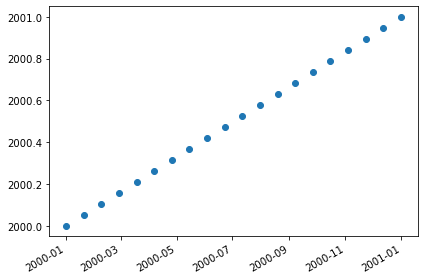

In [27]:
jyear = np.linspace(2000, 2001, 20)  
t = Time(jyear, format='jyear')  
plt.plot_date(t.plot_date, jyear)  
plt.gcf().autofmt_xdate()  # orient date labels at a slant  
plt.tight_layout()

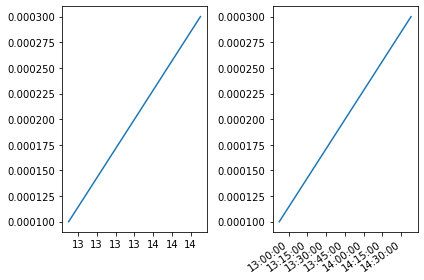

In [28]:
#This can give you much more control over the date
from matplotlib.dates import DateFormatter

jyear = np.linspace(2000.0001, 2000.0003, 20)  
t = Time(jyear, format='jyear')  

plt.subplot(1,2,1)
plt.plot(t.datetime,jyear-2000)
formatter = DateFormatter('%H') #Choose your time format
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
#Changing the format
plt.subplot(1,2,2)
plt.plot(t.datetime,jyear-2000)

formatter = DateFormatter('%H:%M:%S') #Choose your time format
plt.gcf().axes[1].xaxis.set_major_formatter(formatter)
plt.xticks(rotation=35, ha='right')[1] #Rotate axis
#plt.gcf().autofmt_xdate()  # Doesn't work well in subplots
plt.tight_layout()

## Time Differences
Time objects can be added and subtracted in the normal way. Time objects should handle mixed scales okay, but you should be aware of when this is happening.

In [29]:
t1 = Time('2010-01-01 00:00:00')
t2 = Time('2010-02-01 00:00:00')
dt = t2 - t1  # Difference between two Times
print(dt)
print(dt.sec)

from astropy.time import TimeDelta
dt2 = TimeDelta(50.0, format='sec')
t3 = t2 + dt2  # Add a TimeDelta to a Time
print(t3.iso)
print(t2 - dt2)  # Subtract a TimeDelta from a Time

31.0
2678400.0
2010-02-01 00:00:50.000
2010-01-31 23:59:10.000


## Heliocentric and Barycentric times
For precision measurements it is usually useful to move to either the helio center or barycenter of the solar system.

In [30]:
ip_peg = coord.SkyCoord("23:23:08.55", "+18:24:59.3", unit=(u.hourangle, u.deg), frame='icrs')
greenwich = coord.EarthLocation.of_site('greenwich')
times = Time([56325.95833333, 56325.978254], format='mjd', scale='utc', location=greenwich)
ltt_bary = times.light_travel_time(ip_peg)
ltt_helio = times.light_travel_time(ip_peg, 'heliocentric')
times_heliocentre = times.utc + ltt_helio
print(times_heliocentre)
times_barycentre = times.tdb + ltt_bary
print(times_barycentre)
diff = times_barycentre - times_heliocentre
print(diff.sec)

[56325.95456757 56325.97448688]
[56325.95533943 56325.97525874]
[-0.49619002 -0.49613264]


## Sidereal Time
There is also a nice function for getting sidereal time at a given location. Note the times are **UTC**. The location must be a tuple of (longitude, latitude) where longitude is positive east longitude (west is negative).(You can convert a negative or west longitude by adding 360). The mean sidereal time is similar to mean solar time in that it averages out annual variations. The apparent sidereal time is equal to the right ascension on the meridian. **The apparent sidereal time is the one will use when I ask for sidereal time.**

In [31]:
t = Time('2006-01-15 21:24:37.5', scale='utc', location=('120d', '45d'))
print(t.sidereal_time('mean'))  
print(t.sidereal_time('apparent')) #This is what you should generally use.

13h05m22.2787s
13h05m22.2132s


Now its your turn:

Print the Current time and Local Sidereal time.

In [32]:
nt = Time.now()
t = Time(nt, scale='utc', location=('120d', '45d'))
primt(nt)
primt(t.sidereal_time('apparent'))

 2021-09-21 15:24:12.019216
 23h27m05.3449s


Vega was observed in Highland Heights, KY on October 1st, 2016 at 10:41:35.2pm UTC. Calculate the following information for that date:
* Local Sidereal Time
* Julian Date
* Modified Julian Date
* Heliocentric Julian Date
* Barycentric Julian Date

In [33]:
# Location via wikipedia, since I didnt find Highland Heights in EarthLocation
heights = ('39:2:24', '84:27:21')
t = Time('2016-11-01 22:41:35.2', scale='utc',location=heights)
primt(f"sidereal: {t.sidereal_time('apparent'):.8f}")
primt(f"jd: {t.jd:.4f}")
primt(f"mjd: {t.mjd:.4f}")



ip_peg = coord.SkyCoord("23:23:08.55", "+18:24:59.3", unit=(u.hourangle, u.deg), frame='icrs')
ltt_bary = t.light_travel_time(ip_peg)
ltt_helio = t.light_travel_time(ip_peg, 'heliocentric')
times_heliocentre = t.utc + ltt_helio
primt(f"Heliocentric jd: {times_heliocentre}")
times_barycentre = t.tdb + ltt_bary
primt(f"Barycentric jd: {times_barycentre}")

 sidereal: 4.07191607 hourangle
 jd: 2457694.4455
 mjd: 57693.9455
 Heliocentric jd: 2016-11-01 22:47:27.577
 Barycentric jd: 2016-11-01 22:48:37.356


How long did it take you to complete this homework?

so far ~1.5 hours